<a href="https://colab.research.google.com/github/Shuvam02/AI-ML-training/blob/main/Introduction/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Step2: Create the custom Dataset with make_blobs and plot it

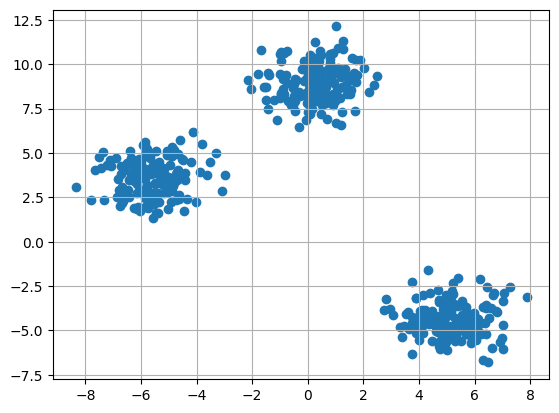

In [2]:
X,y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

fig=plt.figure(0)
plt.grid(True)
plt.scatter(X[ :,0], X[:,1])
plt.show()

step3: initialize the random centroids

The code initializes three clusters for K-means clustering. It sets a random seed and generates random cluster centers within a specified range and empty list of points for each cluster.

In [5]:
k=3

clusters = {}
np.random.seed(23)

for idx in range(k):
  center = 2 * (2*np.random.random((X.shape[1],))-1)
  points =[]
  cluster ={
    'center' : center,
    'points' : []
  }
  clusters[idx]=cluster
clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

step4: plot the random initializes center with data points

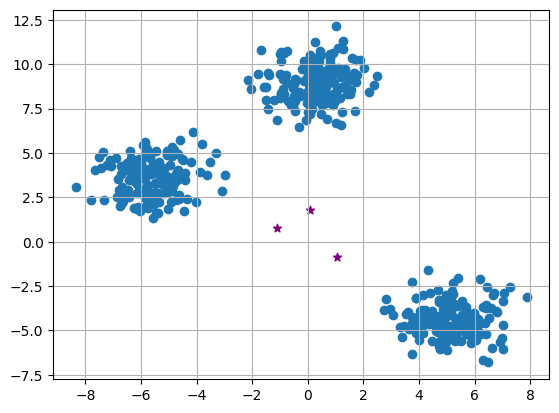

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
for i in clusters:
  center=clusters[i]['center']
  plt.scatter(center[0], center[1], marker='*', c='purple')
plt.show()

The plot displays  a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the inital cluster centers (red stars) generated for K-means clustering.
Step5: define euclidean distance

In [16]:
def distance(p1, p2):
  return np.sqrt(np.sum((p1-p2)**2))

step6: create the funtion to assign and update the cluster center. This state assigns data points to the nearest cluster center and the M-step updates the cluster center based on the mean of assigned points in K-means Clustering.

In [17]:
def assign_clusters(X,clusters):
  for idx in range (X.shape[0]):
    dist=[]
    curr_x= X[idx]

    for i in range(k):
      dis= distance(curr_x, clusters[i]['center'])
      dist.append(dis)
    curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters

def update_clusters(K, clusters):
  for i in range(k):
    points=np.array(clusters[i]['points'])
    if points.shape[0] >0:
      new_center=points.mean(axis=0)
      clusters[i]['center']=new_center

      clusters[i]['points']=[]
  return clusters

step7: create the function to preduct the clusters for the datapoints

In [20]:
def pred_cluster(X, clusters):
  pred= []
  for i in range(X.shape[0]):
    dist=[]
    for j in range(k):
      dist.append(distance(X[i],clusters[j]['center']))
    pred.append(np.argmin(dist))
  return pred

step8: update, assign and predict the cluster center

In [21]:
clusters= assign_clusters(X, clusters)
clusters= update_clusters(X, clusters)
pred= pred_cluster(X, clusters)

step9: plot the data points with predicted  cluster center

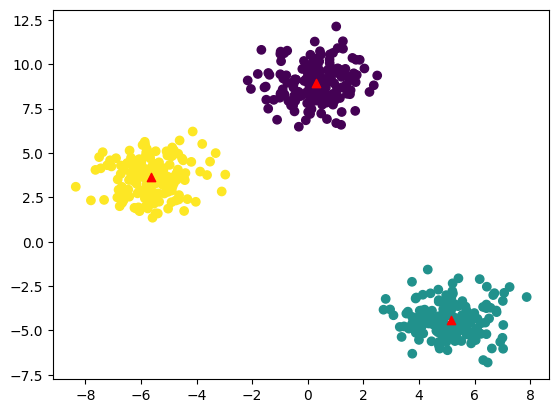

In [22]:
plt.scatter(X[:,0], X[:,1], c = pred)
for i in clusters:
  center=clusters[i]['center']
  plt.scatter(center[0], center[1], marker='^', c='red')
plt.show()